In [3]:
# Library to read csv file effectively
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Method to read the csv file
def load_data(file_name):
    print(file_name)
    column_names = ['area', 'price']
    # To read columns
    io = pandas.read_csv(file_name, names=column_names, header=None)
    x_val = (io.values[1:, 0])
    y_val = (io.values[1:, 1])
    size_array = len(y_val)
    for i in range(size_array):
        x_val[i] = float(x_val[i])
        y_val[i] = float(y_val[i])
    return x_val, y_val

In [48]:
def feature_normalize(train_X):
    #global mean, std
    mean = np.mean(train_X, axis=0)
    std = np.std(train_X, axis=0)
    print("Mean is",mean)
    print("Standard Deviation is",std)
    return (train_X - mean) / std

In [6]:
def main_linear_regression(file_name):
    # Call the method for a specific file
    x_raw, y_raw = load_data(file_name)
    x = feature_normalize(x_raw)
    y = y_raw

    linear_regression_method(x, y)

In [101]:
def linear_regression_method(x, y):
    # Modeling
    w, b = 0.1, 0.1
    num_epoch = 100
    converge_rate = np.zeros([num_epoch, 1], dtype=float)
    learning_rate = 1e-3

    for e in range(num_epoch):
        # Calculate the gradient of the loss function with respect to arguments (model parameters) manually.
        y_predicted = w * x + b
        grad_w, grad_b = (y_predicted - y).dot(x), (y_predicted - y).sum()

        # Update parameters.
        w, b = w - learning_rate * grad_w, b - learning_rate * grad_b
        converge_rate[e] = np.mean(np.square(y_predicted - y))
    print(w, b)

    y_estimated = w * x + b
    #print(converge_rate)
    return [y_estimated, converge_rate] 

In [102]:
# read the file
file_path = "area_price.csv"
xname, yname = load_data(file_path)
#print(yname)

area_price.csv


In [103]:
#normalizing the data
normdata = feature_normalize(xname)
#print(normdata)

Mean is 449.0
Standard Deviation is 202.07176942858692


In [104]:
main = linear_regression_method(normdata, yname)
#print(main)

59.75196191493018 236.99618783941258


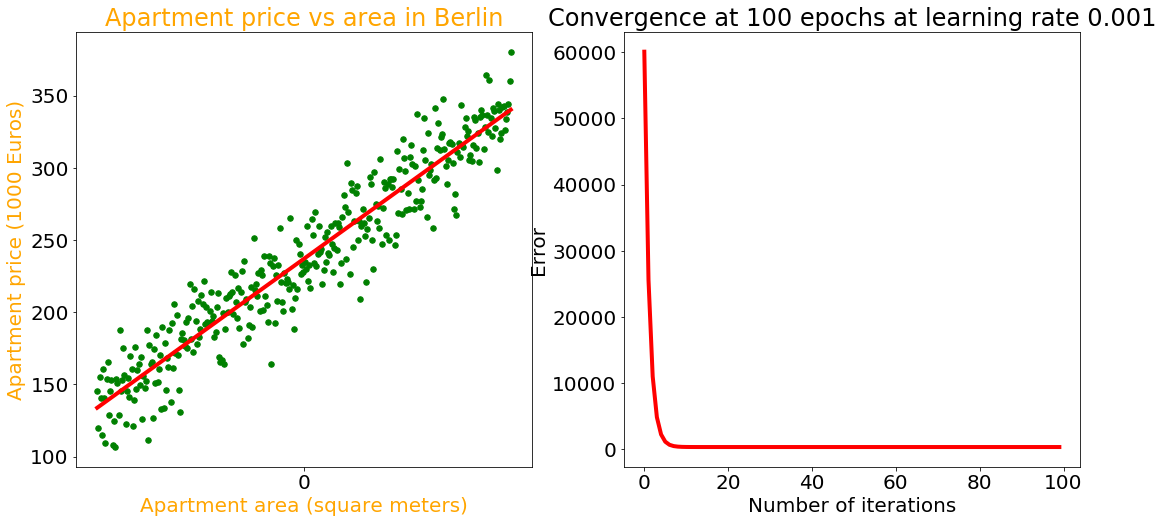

In [106]:
plt.rcParams.update({'font.size': 20})
fig = plt.figure()
fig.set_size_inches(18, 8)
ax = fig.add_subplot(121)

ax.scatter(normdata, yname, color='green', s=30)
ax.set_xlabel('Apartment area (square meters)')
ax.set_ylabel('Apartment price (1000 Euros)')
ax.set_title('Apartment price vs area in Berlin')
ax.plot(normadata, main[0], linewidth=4.0, color='red')

#ax.spines['bottom'].set_color('orange')
#ax.spines['bottom'].set_linewidth(3.0)
#ax.spines['top'].set_color('orange')
#ax.spines['top'].set_linewidth(3.0)
#ax.spines['right'].set_color('orange')
#ax.spines['right'].set_linewidth(3.0)
#ax.spines['left'].set_color('orange')
#ax.spines['left'].set_linewidth(3.0)

#ax.tick_params(axis='x', colors='orange')
#ax.tick_params(axis='y', colors='orange')

# ticks issue
locs, labels = plt.xticks()
plt.xticks(np.arange(locs[2], locs[-2], step=1))

ax.yaxis.label.set_color('orange')
ax.xaxis.label.set_color('orange')
ax.title.set_color('orange')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Number of iterations')
ax2.set_ylabel('Error')
ax2.set_title('Convergence at 100 epochs at learning rate 0.001')
ax2.plot(main[1], linewidth=4.0, color='red')
plt.show()